In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from random import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
water_df = pd.read_csv('water.csv')
water_df.head(20)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


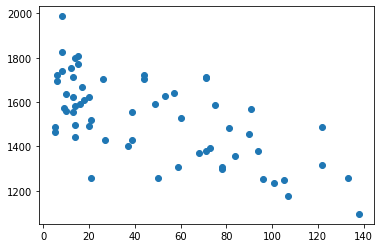

In [6]:
plt.scatter(water_df['hardness'], water_df['mortality'])

In [7]:
water_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
water_df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


На удивление оба метода показывают чрезвычайно близкую корелляцию - чем выше жесткость воды, тем ниже смертность 

In [20]:
x = water_df[['mortality']]
y = water_df[['hardness']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

water_model = LinearRegression().fit(x_train, y_train)

In [21]:
r_sq = water_model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.42685578465984875


Коэффициент детерминации у нас маловат, меньше 50%

In [22]:
y_pred = model.predict(x_test)

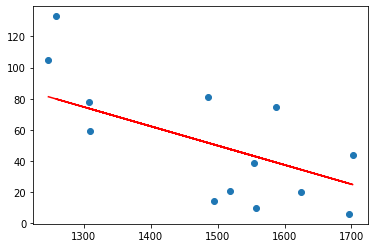

In [23]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Чет как-то немного уныло

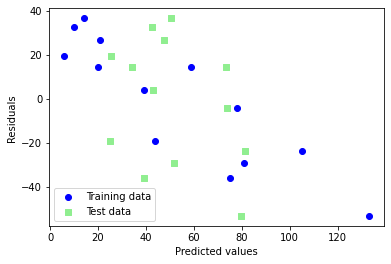

In [29]:
plt.scatter(y_test,  y_pred - y_test, c='blue', marker='o', label='Training data')
plt.scatter(y_pred,  y_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='lower left')

Посмотрим, что у нас с городами по северу и югу

In [31]:
mask_s = water_df['location'] == 'South'
mask_n = water_df['location'] == 'North'
water_s_df = water_df[mask_s]
water_n_df = water_df[mask_n]

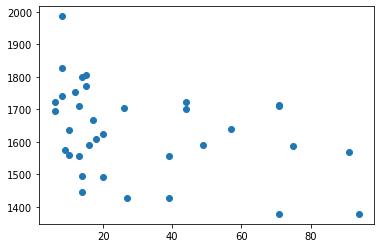

In [32]:
plt.scatter(water_n_df['hardness'], water_n_df['mortality'])

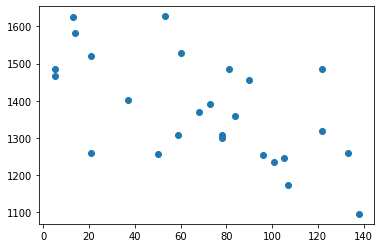

In [33]:
plt.scatter(water_s_df['hardness'], water_s_df['mortality'])

о как интересно! оказывается на Юге у нас все хаотично, да и на Севере не все так однозначно. Посмотрим на корелляцию

In [34]:
water_n_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [35]:
water_s_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


на Юге, что забавно, корелляция в два раза выше, чем на Севере, но все равно меньше чем на общем наборе. Ну и опасная вещь - статистика 

In [36]:
len(water_n_df)

35

In [37]:
len(water_s_df)

26

а данных по Югу то у нас и меньше внезапно. Модет выкинуть случайный значения и сравнять их, а потом проверить

In [75]:
trials = len(water_n_df) - len(water_s_df)
numbers = list(water_n_df.index)
shuffle(numbers)
excess = numbers[:trials]
water_n_df = water_n_df.drop(index=excess)

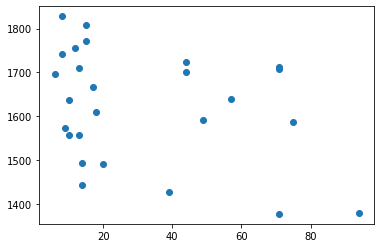

In [76]:
plt.scatter(water_n_df['hardness'], water_n_df['mortality'])

In [77]:
water_n_df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.329337
hardness,-0.329337,1.000000


хмм, а результат-то практически не изменился, разве что корелляция уменьшилась еще больше